Import necessary Modules

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from get_dataset import X
from get_dataset import y

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

seed = 1234

Setup the training data

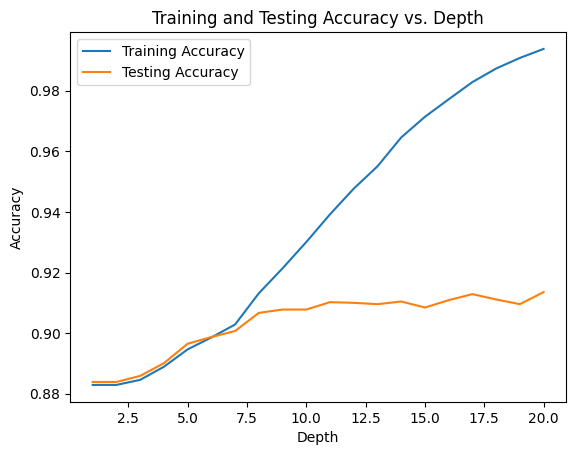

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)

decisionTreeDepthData = {
    'Max Depth': [],
    'Training Accuracy': [],
    'Testing Accuracy': []
}
depths = list(range(1, 21))
models = []
for depth in depths:
    decisionTreeModel = RandomForestClassifier(max_depth=depth, random_state=seed)
    decisionTreeModel.fit(X_train, y_train)
    decisionTreeDepthData['Training Accuracy'].append(decisionTreeModel.score(X_train, y_train))
    decisionTreeDepthData['Testing Accuracy'].append(decisionTreeModel.score(X_test, y_test))
    decisionTreeDepthData['Max Depth'].append(depth)
    models.append(decisionTreeModel)


plt.plot(depths, decisionTreeDepthData['Training Accuracy'], label="Training Accuracy")
plt.plot(depths, decisionTreeDepthData['Testing Accuracy'], label="Testing Accuracy")
plt.legend()
plt.title('Training and Testing Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()


In [12]:
df = pd.DataFrame(decisionTreeDepthData)
print(df)

    Max Depth  Training Accuracy  Testing Accuracy
0           1           0.882917          0.883901
1           2           0.882917          0.883901
2           3           0.884588          0.885891
3           4           0.888913          0.890093
4           5           0.894640          0.896506
5           6           0.898572          0.898717
6           7           0.902848          0.900708
7           8           0.913146          0.906678
8           9           0.921379          0.907784
9          10           0.930055          0.907784
10         11           0.939197          0.910217
11         12           0.947676          0.909996
12         13           0.955025          0.909553
13         14           0.964560          0.910438
14         15           0.971368          0.908448
15         16           0.977144          0.910880
16         17           0.982821          0.912870
17         18           0.987294          0.911101
18         19           0.99078

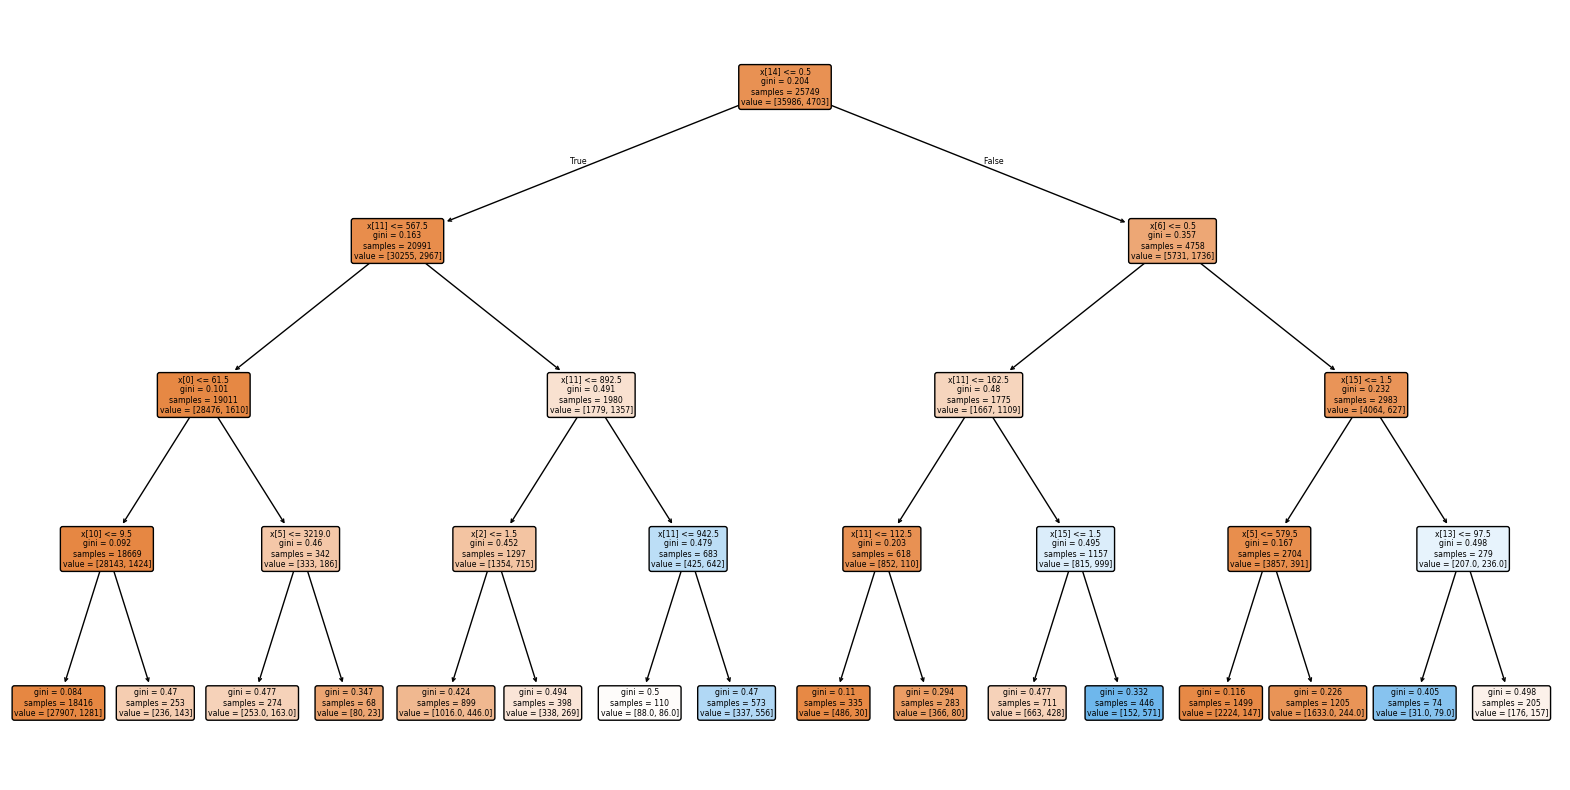

In [23]:
plt.figure(figsize=(20,10))
plot_tree(models[3].estimators_[0],
                    filled=True,
          rounded=True,
          proportion=False)
plt.show()